<a href="https://colab.research.google.com/github/EslamElbassel/Decode-and-Encode-Mnist-dataset-images-GANs/blob/main/GANs_Mnist-dataset_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing packages 

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Input, Model
from keras.datasets import mnist

##Loading data and Splitting it into train and test

In [ ]:
# Loading and splitting images
(train_X, _),(test_X, _) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('X_test:  '  + str(test_X.shape))


X_train: (60000, 28, 28)
X_test:  (10000, 28, 28)


##Creating the models

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.
train_X = np.reshape(train_X, (len(train_X), 28, 28, 1))
test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))

for a in (autoencoder.weights):
  print (a.shape )

decoded_imgs = autoencoder.predict(test_X)

# Encoder model
encoder = Model(input_img, encoded)

# Decoder model
decoder_input= layers.Input(shape=(7, 7, 8))
x = autoencoder.layers[-5](decoder_input)
x = autoencoder.layers[-4](x)
x = autoencoder.layers[-3](x)
x = autoencoder.layers[-2](x)
decoder_output = autoencoder.layers[-1](x)
decoder = Model(decoder_input, decoder_output)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 8)           584 

##Training the model

In [ ]:
autoencoder.fit(train_X, train_X,
                epochs=50, #5, #50,
                batch_size=128,
                shuffle=True,
                validation_data=(test_X, test_X))

Epoch 1/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0452 - val_loss: 0.0046
Epoch 2/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 4/50
469/469 [==============================] - 5s 12ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 6/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 7/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 8/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 9/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 10/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0040 - val_lo


## Decode and Encode unseen images (testing the model)


In [32]:
# Test encoder and decoder
k = 5000
test_imgs = test_X[:k,]
encoded = encoder.predict(test_imgs)
decoded = decoder.predict(encoded)

### Visualize the reconstructed images against their original images 

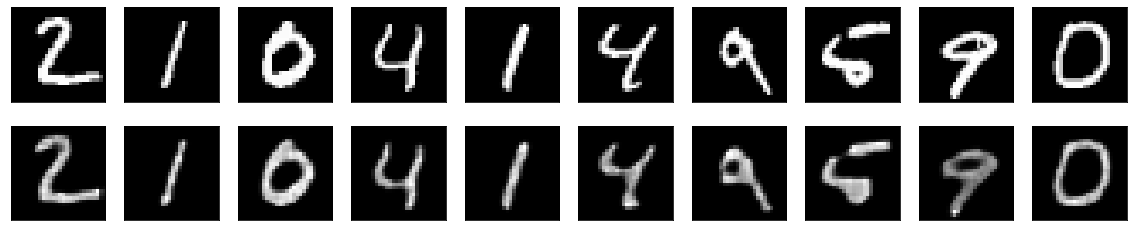

coded images


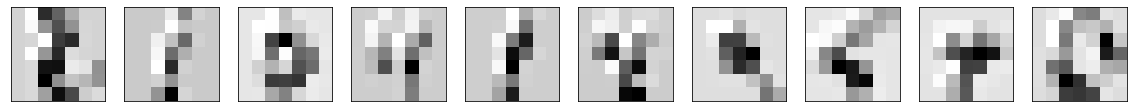

decoded images


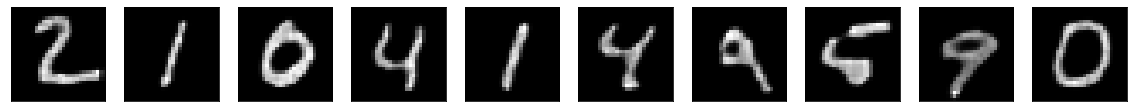

In [39]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_X[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# plot coded images
print ("coded images")
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded[i,:,:,3].reshape((7 , 7)))
    # plt.imshow(encoded_imgs[i].reshape((14 * 14 , 16)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# plot decoded images 
print ("decoded images")
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()